In [52]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [53]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [54]:
X_train.shape
X_test.shape

(10000, 32, 32, 3)

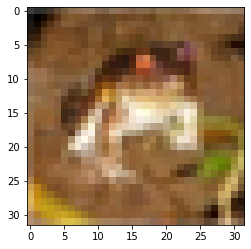

In [55]:
plt.imshow(X_train[0])

In [56]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [57]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

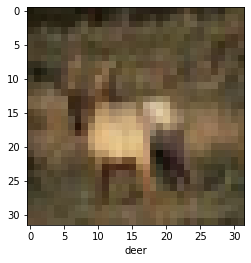

In [59]:
plot_sample(X_train, y_train, 3)

In [60]:
X_train = X_train/255
X_test = X_test/255

In [61]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [62]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer='SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - ETA: 0s - loss: 1.8579 - accuracy: 0.33 - 23s 14ms/step - loss: 1.8579 - accuracy: 0.3342
Epoch 2/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6584 - accuracy: 0.4131
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5704 - accuracy: 0.4450
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5085 - accuracy: 0.4681
Epoch 5/5
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4574 - accuracy: 0.4846


In [63]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [64]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4900 - accuracy: 0.4668


[1.49003267288208, 0.4668000042438507]

In [65]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

In [66]:
cnn.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy']
           )

In [67]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4670 - accuracy: 0.4714
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1003 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9721 - accuracy: 0.6603
Epoch 4/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8940 - accuracy: 0.6872
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8246 - accuracy: 0.7123
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7749 - accuracy: 0.7305
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7230 - accuracy: 0.7461
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6807 - accuracy: 0.76230s - loss: 0.678 - ETA: 0s - loss: 0.6799 - accuracy - ETA: 0s - loss:
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6410 - accuracy: 0.77

In [68]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9402 - accuracy: 0.6847


[0.9402389526367188, 0.6847000122070312]

In [73]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

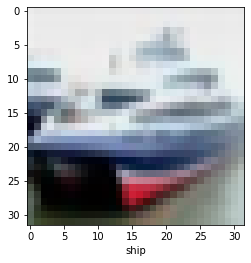

In [75]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [77]:
y_pred = cnn.predict(X_test)

In [78]:
y_pred

array([[7.5129927e-03, 4.1398019e-04, 1.0678334e-02, ..., 2.0375157e-04,
        6.4975090e-02, 4.2930778e-04],
       [9.3073388e-05, 6.3895062e-03, 6.0204033e-09, ..., 1.5412230e-10,
        9.9347198e-01, 4.5296365e-05],
       [1.6042776e-01, 1.6749392e-01, 1.1066764e-03, ..., 5.6200624e-03,
        5.9601939e-01, 4.4220299e-02],
       ...,
       [1.6198750e-04, 2.2418672e-05, 7.0036620e-02, ..., 3.6154115e-01,
        1.8938228e-05, 6.7997491e-04],
       [4.7978301e-02, 1.8639311e-02, 2.6239117e-03, ..., 2.9443770e-03,
        4.1984985e-04, 8.1150141e-04],
       [1.8050541e-06, 4.5838345e-07, 2.0158643e-04, ..., 9.9812907e-01,
        1.5380991e-07, 7.5032739e-07]], dtype=float32)

In [82]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [83]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)